# Logistic Regression

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [2]:
# Read data from data.csv file by using Pandas read_csv() command
data = pd.read_csv("./Social_Network_Ads.csv")  # data readed
data  # view values

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### seperate inputs and outcome

In [3]:
X = data.iloc[:, :-1].values  # except last row, remaining will store into X
Y = data.iloc[:, -1].values  # Last row as Result


X
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## Splitting the dataset into the Training set and Test set

In [4]:
# import train_test_split model selection from sklearn
from sklearn.model_selection import train_test_split

# Spliting into models as 80% of Training and 20% of Test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0
)

In [5]:
# view in console
X_train
X_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


In [6]:
# view in console
Y_train
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

## Feature Scaling

In [7]:
# import standard scalar preprocessing from sklearn
from sklearn.preprocessing import StandardScaler

# create model
sc = StandardScaler()

In [8]:
# apply into our test data models
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
X_train  # view in console

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [10]:
X_test  # View in Console

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674],
       [-0.77184498, -1.52502632],
       [-0.40429975, -1.68064126],
       [ 0.05513178,  2.33422397],
       [-1.59882175, -0.03112299],
       [ 1.06588117, -0.80919764],
       [-0.49618606, -0.62245972],
       [-0.67995868, -0.43572181],
       [ 0.14701809, -0.43572181],
       [ 0.33079071,  0.24898389],
       [-1.41504914,  0.52909077],
       [-0.31241345,  1.49390334],
       [ 0.14701809,  0.24898389],
       [-1.50693545,  0.49796778],
       [ 1.80097163,  1.89850216],
       [-0.03675452, -1.46278035],
       [-0.03675452, -0.6847057 ],
       [ 1.06588117,  2.33422397],
       [ 0.51456332, -0.56021375],
       [ 1.06588117,  1.1204275 ],
       [-1.13939022, -1.27604243],
       [ 1.24965379,  2.24085501],
       [-0.67995868,  0.56021375],
       [-0.58807237,  0.34235285],
       [ 0.14701809,

## Training the Logistic Regression model on the Training set

In [11]:
# Import Logistic Regression model from SKlearn > Linear model
from sklearn.linear_model import LogisticRegression

# Create regression model as classifier
# putting random state 0 it will give same output every time we ran
classifier = LogisticRegression(random_state=0)

# fit model - with create trained model as X_train and Y_train
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [12]:
# random data from the input file to check wheather our model is right or not?
# classifier.predict(X) is used to pridect our result
# X needs to be Array and expecting as 2d as [[a,b]]
# also we trained our model with staandardScalr so, input of predict is expecting transform values
# so we need to give input as sc.transform([[a,b]])

# hear values our predections are
# Below one expecting as 0
print(classifier.predict(sc.transform([[30, 87000]])))

# Bekow one expecting as 1
print(classifier.predict(sc.transform([[42, 104000]])))

[0]
[1]


## Predicting the Test set results

In [13]:
# Predict values
y_pred = classifier.predict(X_test)

# view in console
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [14]:
# mow compare with predicted values with actual values
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1)
)

# We have some incorrect matching, but will try to correct by Confution matrix
# The Confution Matrix give / to show us no.of correct prediction and no.of incorrect prediction

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [15]:
# importing confusion matrix by sklearn > metrixs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# confusion matrix expect 2  i/p , 1st actual result i.e., Y_test, and 2nd is predicted values i.e., y_pred
cm = confusion_matrix(Y_test, y_pred)

# view in console
print(cm)

# lets check accuracy score for this matrix
# same import accuracy score from sklearn  > metrics

# Now check accuracy score
# accuracy_score expect 2  i/p , 1st actual result i.e., Y_test, and 2nd is predicted values i.e., y_pred
accuracy_score(Y_test, y_pred)  # this will give accuracy score

[[52  6]
 [ 3 19]]


0.8875

## Visualising the Training set results

C:\Users\Mohan Govindasamy\AppData\Local\Temp\ipykernel_35528\2438512357.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


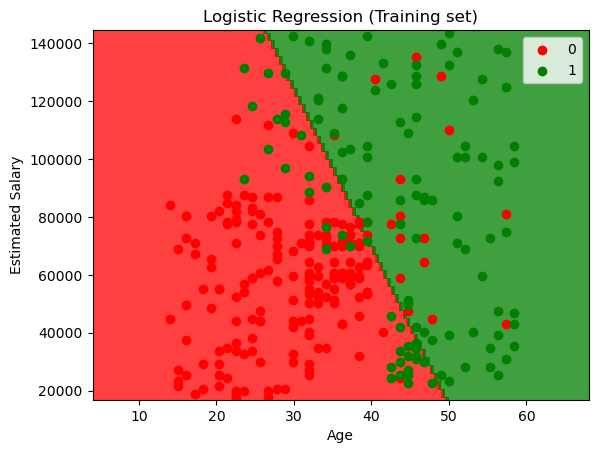

In [18]:
#  Importing the ListedColormap class from matplotlib > colors
from matplotlib.colors import ListedColormap

# Inverse transform the scaled training data
X_set, y_set = sc.inverse_transform(X_train), Y_train

# Create a grid of values spanning the range of the training data
X1, X2 = np.meshgrid(
    np.arange(
        start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5
    ),  # step = 0.25 if you face memorry error please increase values
    # Decrease the step size in np.arange to reduce the number of grid points. This will create a smaller array that requires less memory.
    np.arange(
        start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5
    ),  # step = 0.25 if you face memorry error please increase values
    # Decrease the step size in np.arange to reduce the number of grid points. This will create a smaller array that requires less memory.
)

# Plot the decision boundary by predicting over the grid
plt.contourf(
    X1,
    X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
        X1.shape
    ),
    alpha=0.75,  # Transparency level for the contour plot
    cmap=ListedColormap(["red", "green"]),  # Colormap for the decision boundary
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(["red", "green"])(i),  # Color coding based on class
        label=j,  # Label for the legend
    )
plt.title("Logistic Regression (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()  # Display the legend
plt.show()  # Display the plot

## Visualising the Test set results

C:\Users\Mohan Govindasamy\AppData\Local\Temp\ipykernel_35528\599998635.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


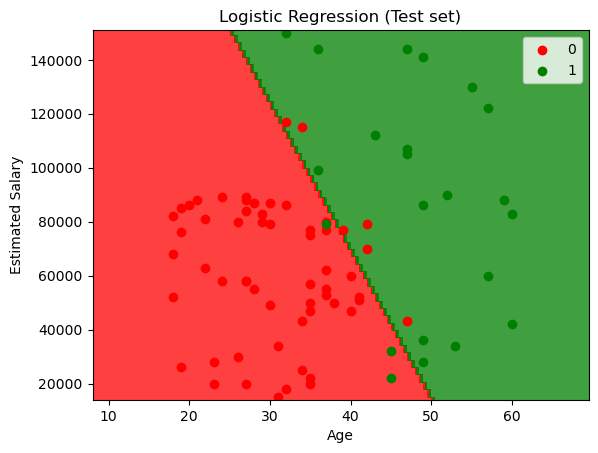

In [19]:
from matplotlib.colors import (
    ListedColormap,
)  # Importing the ListedColormap class from matplotlib

# Inverse transform the scaled test data
X_set, y_set = sc.inverse_transform(X_test), Y_test

# Create a grid of values spanning the range of the test data
X1, X2 = np.meshgrid(
    np.arange(
        start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.5
    ),  # step = 0.25 if you face memorry error please increase values
    # Decrease the step size in np.arange to reduce the number of grid points. This will create a smaller array that requires less memory.
    np.arange(
        start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.5
    ),  # step = 0.25 if you face memorry error please increase values
    # Decrease the step size in np.arange to reduce the number of grid points. This will create a smaller array that requires less memory.
)

# Plot the decision boundary by predicting over the grid
plt.contourf(
    X1,
    X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(
        X1.shape
    ),
    alpha=0.75,  # Transparency level for the contour plot
    cmap=ListedColormap(["red", "green"]),  # Colormap for the decision boundary
)

# Set the limits for the x-axis and y-axis
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot the test data points with color coding for different classes
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(["red", "green"])(i),  # Color coding based on class
        label=j,  # Label for the legend
    )

# Adding title and labels to the plot
plt.title("Logistic Regression (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()  # Display the legend
plt.show()  # Display the plot